In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from pyThermoML.core import DataReport

sns.set_context("talk")


# Analyse ThermoML

### Read in ThermoML xml file

In [2]:
# Read in existing thermoml file
datareport = DataReport().from_xml( open("files/nguyen_et_al_JOURNAL_VOL_YEAR_PAGE.xml","rb") )


### List compounds in the file

In [4]:
# Check exisiting components
ids = datareport.list_compounds()


The datareport contains the following compounds:

   1: dioxane
   2: formic acid


### List the reported properties

In [3]:
# Check all existing properties
prop_list = datareport.get_property_list( verbose = True )

Excess molar enthalpy (molar enthalpy of mixing), kJ/mol
Excess molar volume, m3/mol
Mass density, kg/m3


### Gather all reported properties (including variables and constraints)

In [3]:
# Check all existing data
all_data = datareport.get_all_data( verbose = True )

All data saved in the datareport:

  Excess molar enthalpy (molar enthalpy of mixing), kJ/mol                                variable     constraint                            
                                                      mean 95_confidence Mole fraction  of dioxane Temperature, K Pressure, kPa Pressure, kPa
0                                                 -1.09043       0.34094                       0.2         298.15         101.0         101.0
1                                                 -1.45257       0.37676                       0.4         298.15         101.0         101.0
2                                                 -1.23283       0.43594                       0.6         298.15         101.0         101.0
3                                                 -0.66402       0.50605                       0.8         298.15         101.0         101.0 

  Excess molar enthalpy (molar enthalpy of mixing), kJ/mol                                variable     constrai

### Gather data for one property over the composition of one compound and a provided variable

In [5]:
# Extract excess molar enthalpy data over the mole fraction of dioxan for different temperatures
enthalpy_data = datareport.analysis_property(  prop_name = "Excess molar enthalpy",
                                                prop_identifier = ""
                                              )
enthalpy_data

,mean,95_confidence,Mole fraction of dioxane,"Temperature, K","Pressure, kPa"
0,-1.09043,0.34094,0.2,298.15,101.0
1,-1.45257,0.37676,0.4,298.15,101.0
2,-1.23283,0.43594,0.6,298.15,101.0
3,-0.66402,0.50605,0.8,298.15,101.0
0,-1.10691,0.58820,0.2,303.15,101.0
1,-1.48017,0.60938,0.4,303.15,101.0
2,-1.25172,0.62830,0.6,303.15,101.0
3,-0.69201,0.65447,0.8,303.15,101.0


### Plot the extracted data

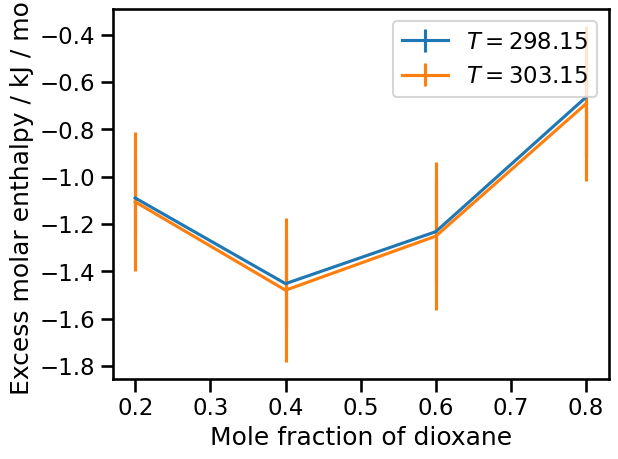

In [6]:
fig, ax = plt.subplots()

for _,df in enthalpy_data.groupby("Temperature, K"):
    ax.errorbar( df["Mole fraction of dioxane"], df["mean"], df["95_confidence"]/2, label=r'$T =$' + f'{df["Temperature, K"].iloc[0]}' )
ax.legend()
ax.set_xlabel("Mole fraction of dioxane")
ax.set_ylabel("Excess molar enthalpy / kJ / mol")
plt.show()

In [7]:
# Extract excess molar volume data over the mole fraction of dioxan for different temperatures
volume_data = datareport.analysis_property(  prop_name = "Excess molar volume",
                                                              prop_identifier = ""
                                                            )
volume_data

,mean,95_confidence,Mole fraction of dioxane,"Temperature, K","Pressure, kPa"
0,-2.966700e-07,2.374700e-07,0.2,293.15,101.0
1,-2.992400e-07,2.449100e-07,0.4,293.15,101.0
2,-1.792500e-07,2.656000e-07,0.6,293.15,101.0
3,-4.826000e-08,3.040500e-07,0.8,293.15,101.0


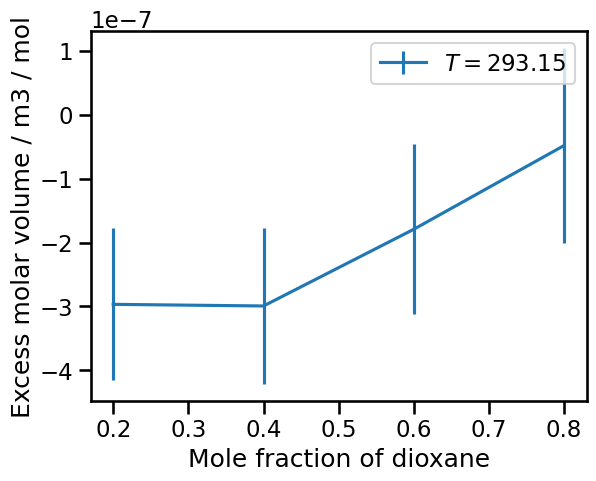

In [8]:
fig, ax = plt.subplots()

for _,df in volume_data.groupby("Temperature, K"):
    ax.errorbar( df["Mole fraction of dioxane"], df["mean"], df["95_confidence"]/2, label=r'$T =$' + f'{df["Temperature, K"].iloc[0]}' )
ax.legend()
ax.set_xlabel("Mole fraction of dioxane")
ax.set_ylabel("Excess molar volume / m3 / mol")
plt.show()

In [4]:
# Extract density data of the whole system
density_data_whole = datareport.analysis_property( prop_name = "Mass density",
                                             prop_identifier = ""
                                            )
density_data_whole

,mean,95_confidence,Mole fraction of dioxane,"Temperature, K","Pressure, kPa",Mole fraction of formic acid
0,1166.26080,0.80752,0.2,293.15,101.0,NaN
1,1121.65440,1.20860,0.4,293.15,101.0,NaN
2,1087.77700,0.84835,0.6,293.15,101.0,NaN
3,1062.31010,1.05610,0.8,293.15,101.0,NaN
0,1100.48540,0.70517,0.2,348.15,101.0,NaN
1,1057.63460,0.69973,0.4,348.15,101.0,NaN
2,1039.94620,0.86100,0.5,348.15,101.0,NaN
3,1024.28880,0.91822,0.6,348.15,101.0,NaN
4,998.50710,0.57198,0.8,348.15,101.0,NaN
5,987.75882,1.00571,0.9,348.15,101.0,NaN


In [6]:
density_data_mix = density_data_whole[ density_data_whole["Mole fraction of dioxane"] < 1.0 ]
density_data_mix = density_data_mix.drop(columns=["Mole fraction of formic acid"])
density_data_mix

,mean,95_confidence,Mole fraction of dioxane,"Temperature, K","Pressure, kPa"
0,1166.26080,0.80752,0.2,293.15,101.0
1,1121.65440,1.20860,0.4,293.15,101.0
2,1087.77700,0.84835,0.6,293.15,101.0
3,1062.31010,1.05610,0.8,293.15,101.0
0,1100.48540,0.70517,0.2,348.15,101.0
1,1057.63460,0.69973,0.4,348.15,101.0
2,1039.94620,0.86100,0.5,348.15,101.0
3,1024.28880,0.91822,0.6,348.15,101.0
4,998.50710,0.57198,0.8,348.15,101.0
5,987.75882,1.00571,0.9,348.15,101.0


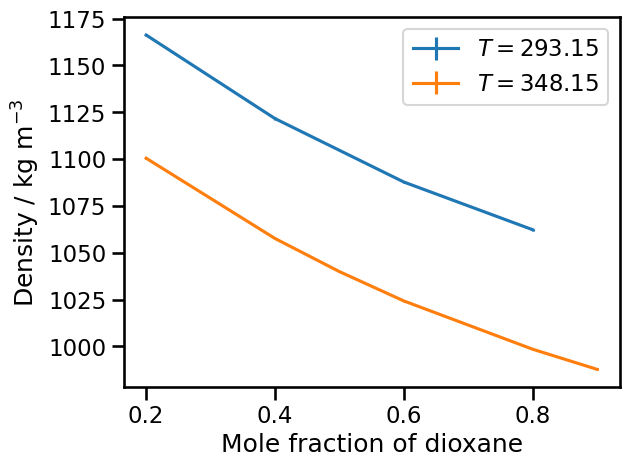

In [7]:
fig, ax = plt.subplots()

for _,df in density_data_mix.groupby("Temperature, K"):
    ax.errorbar( df["Mole fraction of dioxane"], df["mean"], df["95_confidence"]/2, label=r'$T =$' + f'{df["Temperature, K"].iloc[0]}' )
ax.legend()
ax.set_xlabel("Mole fraction of dioxane")
ax.set_ylabel("Density / kg m$^{-3}$")
plt.show()

In [10]:
density_data_pure_dioxane = density_data_whole[ density_data_whole["Mole fraction of dioxane"] == 1 ]
density_data_pure_dioxane = density_data_pure_dioxane.drop(columns=["Mole fraction of formic acid"])
density_data_pure_dioxane

,mean,95_confidence,Mole fraction of dioxane,"Temperature, K","Pressure, kPa",Mole fraction of formic acid
0,1043.43780,0.66598,1.0,293.15,101.0,NaN
1,1041.08540,0.87074,1.0,295.15,101.0,NaN
2,1037.66280,0.93715,1.0,298.15,101.0,NaN
3,1031.80340,0.80448,1.0,303.15,101.0,NaN
4,1020.05740,0.99180,1.0,313.15,101.0,NaN
5,1008.25540,0.74948,1.0,323.15,101.0,NaN
6,978.43912,0.46205,1.0,348.15,101.0,NaN


In [13]:
density_data_pure_formic_acid = density_data_whole[ density_data_whole["Mole fraction of formic acid"] == 1 ]
density_data_pure_formic_acid = density_data_pure_formic_acid.drop(columns=["Mole fraction of dioxane"])
density_data_pure_formic_acid

,mean,95_confidence,"Temperature, K","Pressure, kPa",Mole fraction of formic acid
0,1223.7550,0.57433,293.15,101.0,1.0
1,1221.2876,0.54738,295.15,101.0,1.0
2,1217.6072,0.67464,298.15,101.0,1.0
3,1211.5294,0.62863,303.15,101.0,1.0
4,1199.2596,0.57305,313.15,101.0,1.0
5,1186.8726,0.70271,323.15,101.0,1.0
6,1155.5100,0.64253,348.15,101.0,1.0


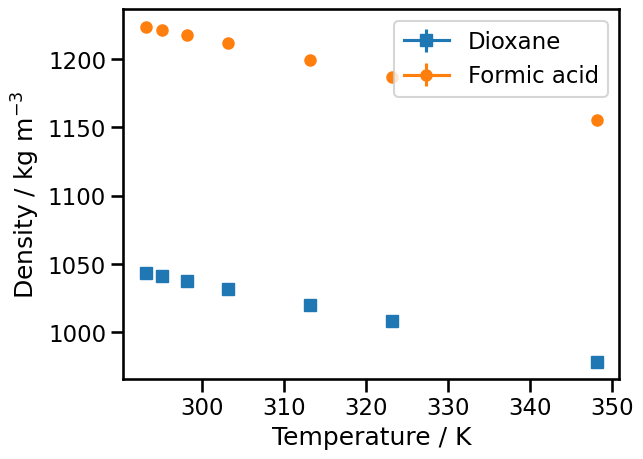

In [25]:
fig, ax = plt.subplots()

for i,(_,df) in enumerate(density_data_pure_dioxane.groupby("Temperature, K")):
    if i == 0:
        ax.errorbar( df["Temperature, K"], df["mean"], df["95_confidence"]/2, color="tab:blue", markersize=8, marker="s", label="Dioxane" )
    else:
        ax.errorbar( df["Temperature, K"], df["mean"], df["95_confidence"]/2, color="tab:blue", markersize=8, marker="s" )

for i,(_,df) in enumerate(density_data_pure_formic_acid.groupby("Temperature, K")):
    if i == 0:
        ax.errorbar( df["Temperature, K"], df["mean"], df["95_confidence"]/2, color="tab:orange", markersize=8, marker="o", label="Formic acid" )
    else:
        ax.errorbar( df["Temperature, K"], df["mean"], df["95_confidence"]/2, color="tab:orange", markersize=8, marker="o" )

ax.legend()
ax.set_xlabel("Temperature / K")
ax.set_ylabel("Density / kg m$^{-3}$")
plt.show()